# Task 1: Data Cleaning & Preprocessing

Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Step 2:Upload File

In [2]:
from google.colab import files

uploaded = files.upload()


Saving Telco_Customer_Churn_Dataset .csv to Telco_Customer_Churn_Dataset  (6).csv


In [3]:
import pandas as pd

df = pd.read_csv(list(uploaded.keys())[0])
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Step 3: Extract Information

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df.duplicated().sum()

np.int64(0)

Step 4: Find missing values

In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [9]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Step 5: Handle missing values

In [10]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


/tmp/ipython-input-40832498.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


Step 6: Encode target variable

In [11]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [12]:
df = pd.get_dummies(df, drop_first=True)


Step 7: Verify

In [13]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 7073 entries, SeniorCitizen to PaymentMethod_Mailed check
dtypes: bool(7068), float64(2), int64(3)
memory usage: 47.7 MB


In [14]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


# Conclusion
Handled missing values in TotalCharges using median imputation, converted the Churn column into binary format, transformed categorical variables using one-hot encoding, and ensured the dataset was suitable for machine learning models.

# TASK 2: Exploratory Data Analysis

Step 1: Import visualization libraries

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load fresh file
df = pd.read_csv(list(uploaded.keys())[0])

# Clean column names (removes hidden spaces)
df.columns = df.columns.str.strip()

# Fix TotalCharges
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Clean Churn column safely
df["Churn"] = df["Churn"].astype(str).str.strip().str.lower()
df["Churn"] = df["Churn"].map({"yes": 1, "no": 0})

# Check churn is now valid
print(df["Churn"].value_counts())

# Drop customerID if present
df.drop(columns=["customerID"], errors="ignore", inplace=True)



Saving Telco_Customer_Churn_Dataset .csv to Telco_Customer_Churn_Dataset  (7).csv
Churn
0    5174
1    1869
Name: count, dtype: int64


/tmp/ipython-input-2720769299.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


Step 2: Ensure Churn column is usable

In [16]:
if df["Churn"].dtype == object:
    df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


Step 3: Overall churn rate

In [17]:
churn_rate = df["Churn"].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")


Overall Churn Rate: 26.54%


Step 4: Churn Distribution

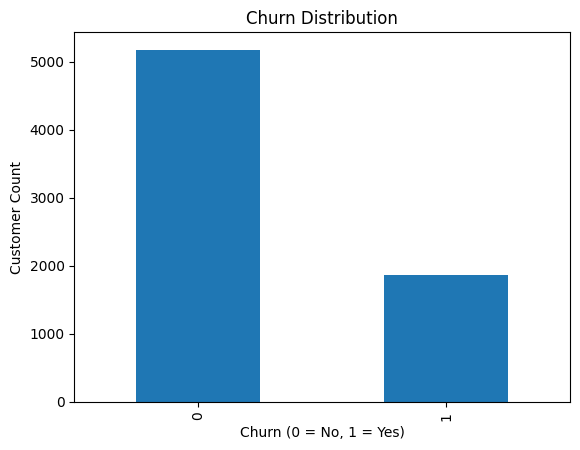

In [18]:
plt.figure()
df["Churn"].value_counts().sort_index().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.show()

Step 5: Tenure vs Churn Analysis

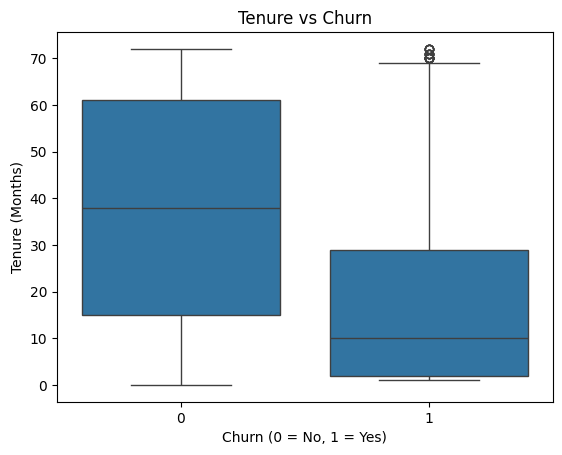

In [19]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (Months)")
plt.show()


Step 6: Monthly Charges vs Churn

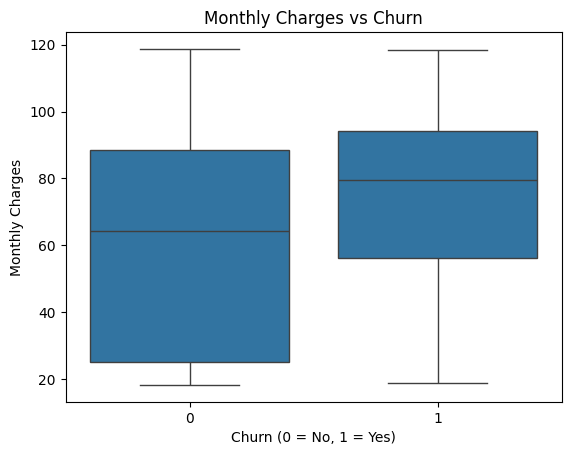

In [20]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()


Step 7: Contract Type vs Churn

In [21]:
contract_cols = [col for col in df.columns if "Contract" in col]

churn_by_contract = df.groupby(contract_cols)["Churn"].mean()
print("Churn Rate by Contract Type:")
print(churn_by_contract)


Churn Rate by Contract Type:
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


Step 8: Feature Correlation Analysis

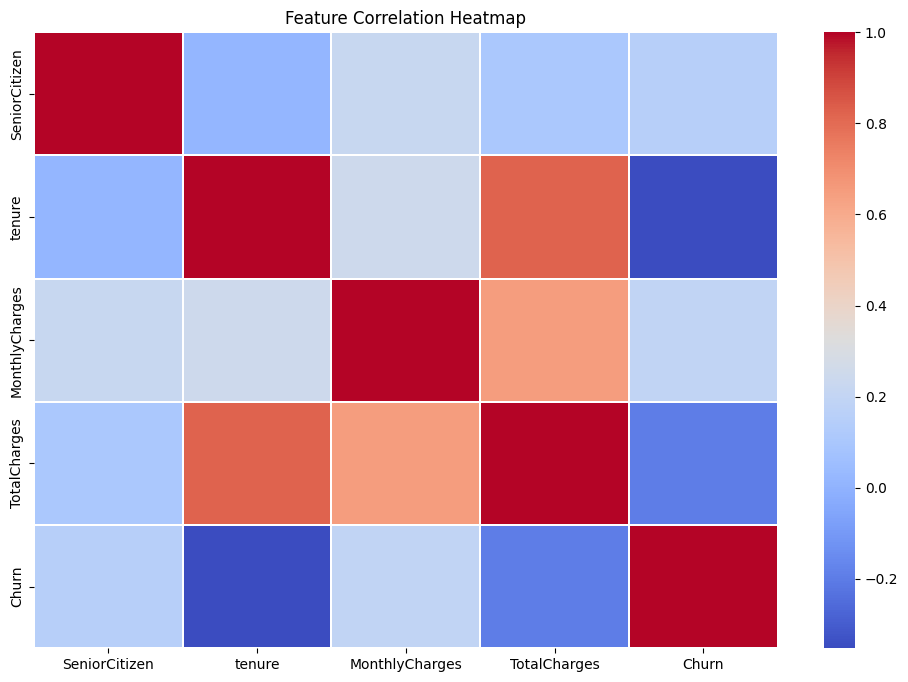

In [22]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.3)
plt.title("Feature Correlation Heatmap")
plt.show()


# Conclusion
In this task, exploratory data analysis was performed to understand customer churn behavior. The overall churn rate was found to be around 26%, indicating a significant retention challenge. Customers with lower tenure were more likely to churn compared to long-term customers, showing that early-stage customers are at higher risk. Higher monthly charges were also associated with higher churn, suggesting price sensitivity among customers. Contract type showed a strong relationship with churn, where month-to-month customers had the highest churn compared to customers with long-term contracts. The correlation analysis further highlighted important features related to churn. These insights will guide the next steps such as customer segmentation, churn prediction modeling, and retention strategy development.

# TASK 3: Customer Segmentation

Step 1: Create Tenure Segments

In [23]:
df["TenureGroup"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-12 months", "12-24 months", "24-48 months", "48+ months"]
)


Step 2: Create Monthly Charges Segments

In [24]:
df["ChargesGroup"] = pd.cut(
    df["MonthlyCharges"],
    bins=[0, 35, 70, 120],
    labels=["Low", "Medium", "High"]
)

Step 3: Churn Rate by Tenure Segment

In [25]:
tenure_segment_churn = df.groupby("TenureGroup")["Churn"].mean() * 100
print("Churn Rate by Tenure Group:")
print(tenure_segment_churn)


Churn Rate by Tenure Group:
TenureGroup
0-12 months     47.678161
12-24 months    28.710938
24-48 months    20.388959
48+ months       9.513176
Name: Churn, dtype: float64


/tmp/ipython-input-1508457084.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_segment_churn = df.groupby("TenureGroup")["Churn"].mean() * 100


Step 4: Churn Rate by Charges Segment

In [26]:
charges_segment_churn = df.groupby("ChargesGroup")["Churn"].mean() * 100
print("\nChurn Rate by Monthly Charges Group:")
print(charges_segment_churn)



Churn Rate by Monthly Charges Group:
ChargesGroup
Low       10.893372
Medium    23.942029
High      35.361429
Name: Churn, dtype: float64


/tmp/ipython-input-505178160.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_segment_churn = df.groupby("ChargesGroup")["Churn"].mean() * 100


Step 5: Visualize Segments

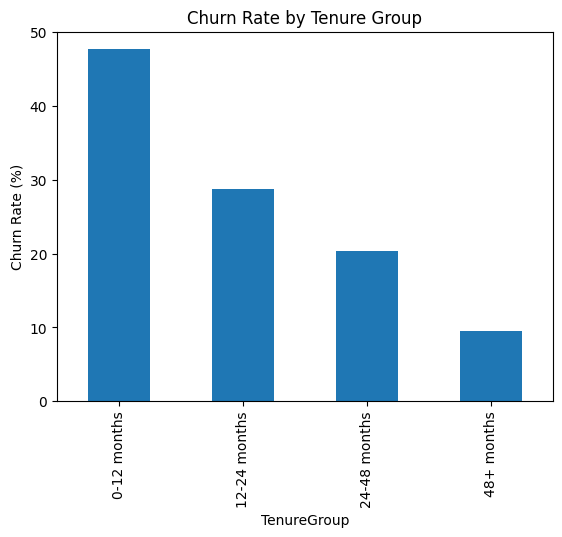

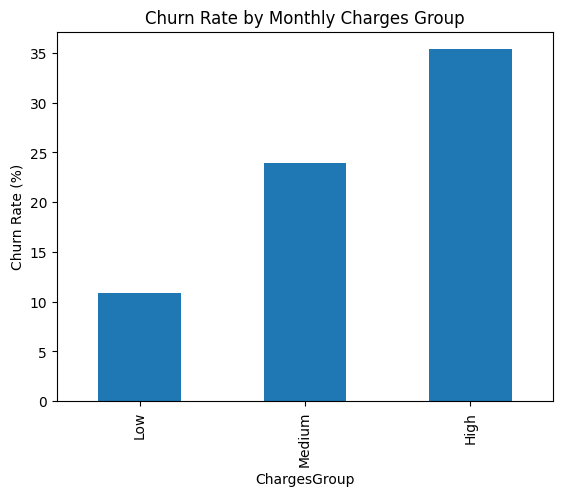

In [27]:
import matplotlib.pyplot as plt

# Plot tenure segmentation
plt.figure()
tenure_segment_churn.plot(kind="bar")
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate (%)")
plt.show()

# Plot charges segmentation
plt.figure()
charges_segment_churn.plot(kind="bar")
plt.title("Churn Rate by Monthly Charges Group")
plt.ylabel("Churn Rate (%)")
plt.show()


# Conclusion
In this task, customers were segmented based on tenure and monthly charges. Customers in the 0–12 month tenure group showed the highest churn rate, indicating that new customers are more likely to leave. Customers with high monthly charges also exhibited higher churn compared to low and medium charge groups. This segmentation helps identify high-risk customer groups, which can be targeted with specific retention strategies.

# TASK 4: Churn Prediction Model

Step 1: Import Required Libraries

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Step 2: Prepare Features and Target

In [29]:

X = df.drop("Churn", axis=1)
y = df["Churn"]


Step 3: Convert Categorical Columns

In [30]:
X = pd.get_dummies(X, drop_first=True)


Step 4: Train-Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Step 5: Train Logistic Regression Model

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.7934705464868701
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



Step 6: Make Predictions

In [34]:
y_pred = model.predict(X_test)


Step 7: Model Evaluation

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8147622427253371

Confusion Matrix:
 [[940  96]
 [165 208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



# Conclusion
In this task, a Logistic Regression model was built to predict customer churn. The dataset was split into training and testing sets, and the model was trained using the training data. The model performance was evaluated using accuracy, confusion matrix, precision, recall, and F1-score. The results show that the model is able to reasonably predict churn and can be further improved using advanced models and feature tuning

# TASK 5: Customer Retention Strategies

Step 1: Identify High-Risk Customers

In [36]:
df_test = X_test.copy()
df_test["ActualChurn"] = y_test.values
df_test["PredictedChurn"] = y_pred

Step 2: Extract High-Risk Segment

In [37]:
high_risk_customers = df_test[df_test["PredictedChurn"] == 1]
print("Number of high-risk customers:", len(high_risk_customers))


Number of high-risk customers: 304


Step 3: Analyze Characteristics of High-Risk Customers

In [38]:
print(high_risk_customers.describe())


       SeniorCitizen      tenure  MonthlyCharges  TotalCharges  ActualChurn  \
count     304.000000  304.000000      304.000000     304.00000   304.000000   
mean        0.296053   10.177632       79.539638     911.03898     0.684211   
std         0.457267   12.161510       18.842629    1201.16460     0.465596   
min         0.000000    1.000000       24.400000      24.40000     0.000000   
25%         0.000000    2.000000       71.500000     106.91250     0.000000   
50%         0.000000    5.000000       83.425000     364.97500     1.000000   
75%         1.000000   14.000000       93.200000    1225.51250     1.000000   
max         1.000000   63.000000      109.900000    6479.40000     1.000000   

       PredictedChurn  
count           304.0  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0  


Step 4: Business-Oriented Retention Strategies
Retention Strategies Based on Analysis:

1.*Target new customer*s:
Customers with low tenure show the highest churn. Introduce onboarding programs, welcome discounts, and regular follow-up calls during the first 3 months.

2.*Optimize pricing for high-bill customers*:
Customers with high monthly charges are more likely to churn. Provide flexible plans, loyalty discounts, or bundle offers to reduce perceived cost.

3.*Encourage long-term contracts*:
Month-to-month customers have the highest churn. Promote 1-year and 2-year contracts with incentives such as reduced monthly fees.

4.*Improve service quality*:
Customers lacking tech support or online security services tend to churn more. Offer free trials of these services to increase engagement.

5.*Personalized retention campaigns*:
Use the prediction model to identify high-risk customers and target them with personalized offers before they churn.

# Conclusion
In this task, high-risk customers were identified using the churn prediction model. Based on customer characteristics and behavioral patterns, several targeted retention strategies were proposed. Implementing these strategies can help reduce churn, increase customer lifetime value, and improve overall business profitability.

# TASK 6: Advanced Visualizations

Step 1: Churn by Contract Type

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


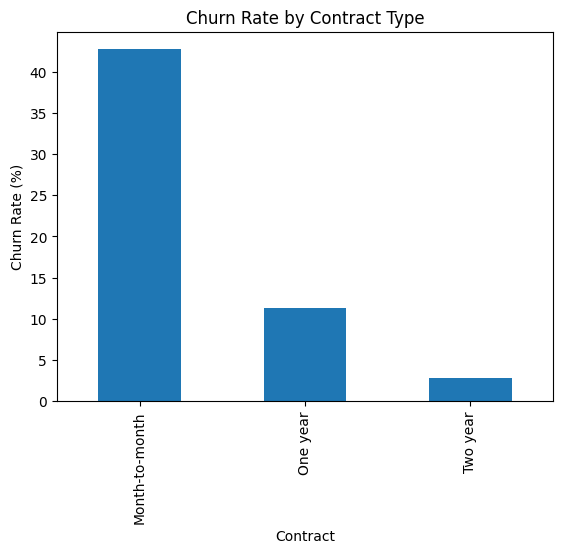

In [39]:
ontract_cols = [col for col in df.columns if "Contract" in col]

if contract_cols:
    contract_churn = df.groupby(contract_cols)["Churn"].mean() * 100
    print(contract_churn)

    contract_churn.plot(kind="bar")
    plt.title("Churn Rate by Contract Type")
    plt.ylabel("Churn Rate (%)")
    plt.show()

Step 2: Churn by Tenure Group

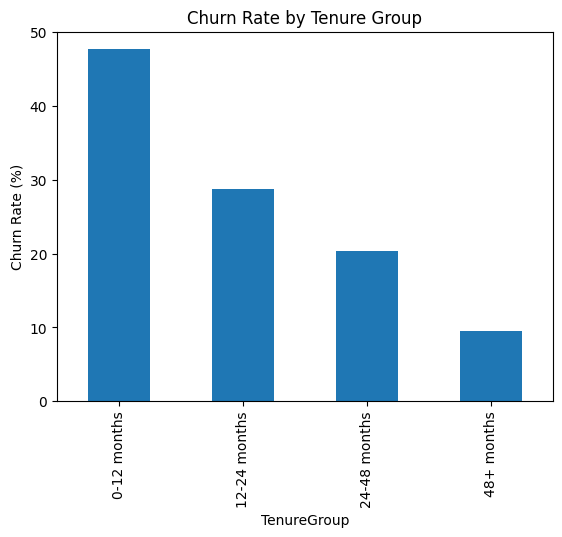

In [40]:
tenure_segment_churn.plot(kind="bar")
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate (%)")
plt.show()


Step 3: Churn by Monthly Charges Group

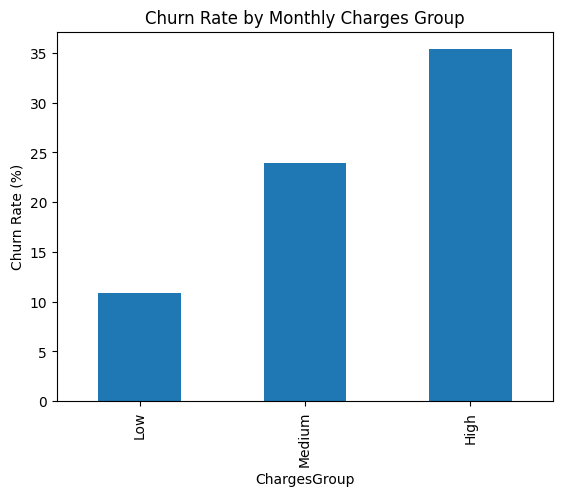

In [41]:
charges_segment_churn.plot(kind="bar")
plt.title("Churn Rate by Monthly Charges Group")
plt.ylabel("Churn Rate (%)")
plt.show()


Step 4: Distribution of Monthly Charges

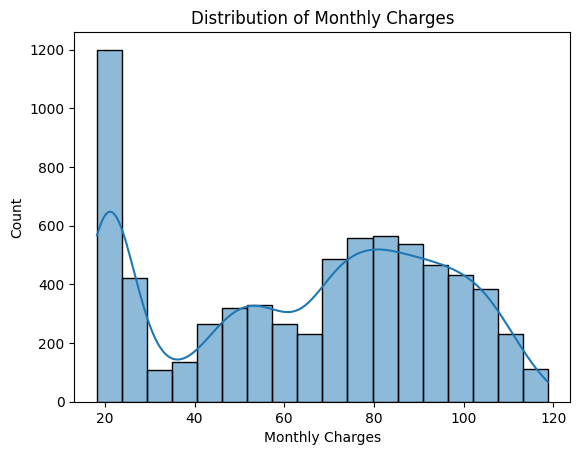

In [42]:
plt.figure()
sns.histplot(df["MonthlyCharges"], kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.show()


Step 5: Tenure Distribution

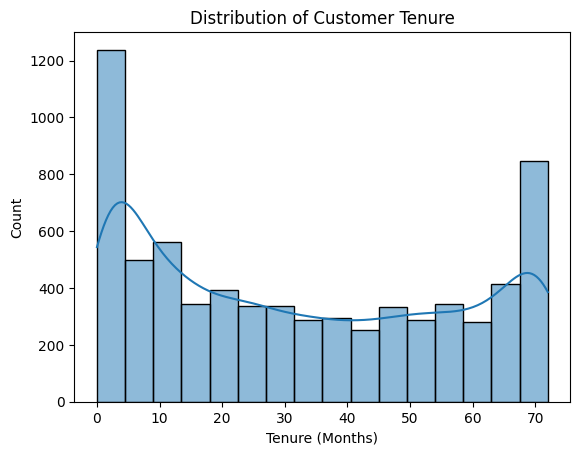

In [43]:
plt.figure()
sns.histplot(df["tenure"], kde=True)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.show()


# Conclusion
In this task, multiple visualizations were created to clearly communicate key insights. Bar charts showed churn differences across contract types, tenure groups, and monthly charge segments. Histograms helped understand the distribution of customer tenure and monthly charges. These visualizations make the analysis easier to interpret and can be used for reports and presentations.